Financial Inclusion Zindi Competition
---
&copy;Rimana Sifiso, Student at the University of Johannesburg
May 2024

## Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as stats

## Data Loading

In [2]:
# load data
train = pd.read_csv("Train.csv")

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Part 1: EDA and Data Cleaning

### 1.1 Univariate analysis

#### _Bank Account_

This variable tracks whether a respondent has a bank account or not. Evidently, this depends on a lot of factors such as age, level of income, level of education of the respondent, among others. 

In [4]:
train["bank_account"].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
train["bank_account"].isna().sum()

0

In [6]:
train["bank_account"].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: bank_account, dtype: object

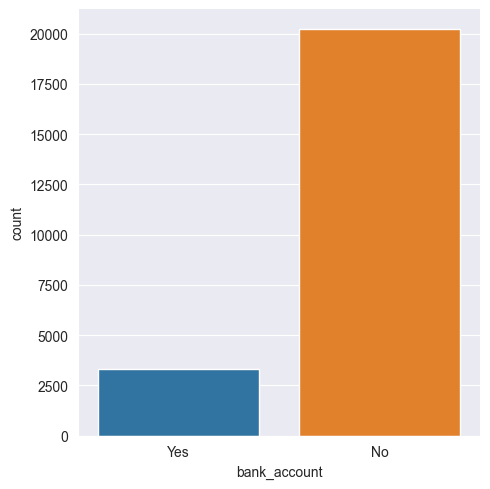

In [7]:
sns.catplot(data=train, x="bank_account", kind="count")

In [29]:
# Calculate the number of interviewees with a bank account
respondents_with_bank_account = train[train["bank_account"]=="Yes"]["bank_account"].count()
respondents_with_no_bank_account = train[train["bank_account"]=="No"]["bank_account"].count()
total_respondents = len(train)

bank_account_distribution_df = \
    pd.DataFrame(
        data={
            "Count":[respondents_with_bank_account,respondents_with_no_bank_account], 
            "Proportion (%)":[
                round(respondents_with_bank_account*100/total_respondents, 2), 
                round(respondents_with_no_bank_account*100/total_respondents,2)
            ]
        }, 
        index=["Respondents with bank account", "Respondents with no bank account"]
    )

print(f"Number of Respondents with bank account: {respondents_with_bank_account}\n"
      f"Number of respondents with no bank account: {respondents_with_no_bank_account}")
bank_account_distribution_df

Number of Respondents with bank account: 3312
Number of respondents with no bank account: 20212


,Count,Proportion (%)
Respondents with bank account,3312,14.08
Respondents with no bank account,20212,85.92


Only about $14.08\%$ of respondents have bank accounts, the other $85.92\%$ have no bank accounts. Next, we dig deeper at what factors potentially determine respondents to have bank accounts.

### Bank account and location type

In [31]:
train['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [33]:
train['location_type'].isna().sum()

0

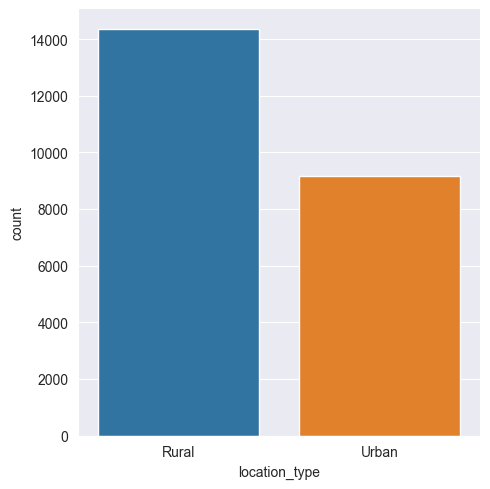

In [34]:
sns.catplot(data=train, x="location_type", kind="count")

In [35]:
# Calculate the number of interviewees with a bank account
rural = train[train["location_type"]=="Rural"]["location_type"].count()
urban = train[train["location_type"]=="Urban"]["location_type"].count()


location_type_distribution_df = \
    pd.DataFrame(
        data={
            "Count":[rural,urban],
            "Proportion (%)":[
                round(rural*100/total_respondents, 2),
                round(urban*100/total_respondents,2)
            ]
        },
        index=["Respondents residing in the rural areas", "Respondents residing in the urban areas"]
    )

location_type_distribution_df

,Count,Proportion (%)
Respondents residing in the rural areas,14343,60.97
Respondents residing in the urban areas,9181,39.03


The distribution of the respondents' location types is relatively balanced and aligns with the geographic distribution commonly seen in many African countries. Specifically, $60.97\%$ of the respondents reside in rural areas, while $39.03\%$ live in urban areas. This leads us to a natural question: "Is there a relationship between the respondents' location type and their bank account ownership?"

If such a relationship exists, it would imply that the variables `location_type` and `bank_account` are statistically dependent. To test this assumption, we will perform a Pearson's Chi-Squared Test for Independence at a $5\%$ confidence level. Before conducting the statistical test, let's visualize the data using graphics.

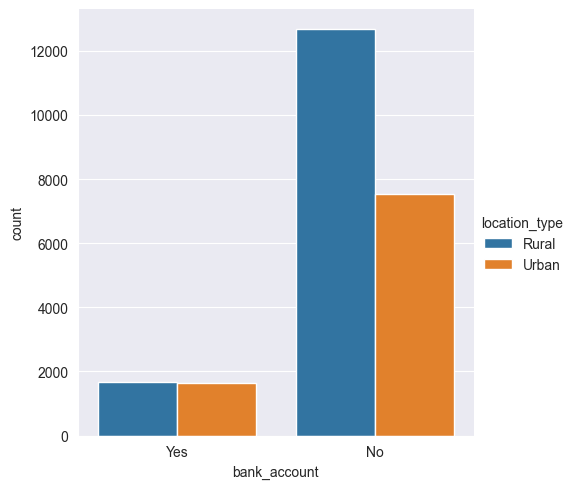

In [38]:
# Combine the bank_account_distribution_df and location_type_distribution_df dataframes
sns.catplot(data=train, x='bank_account', hue='location_type', kind='count')

Given the plot above, it might seem natural to assume that most respondents without a bank account are from rural areas. However, we should be cautious with this assumption. The data shows that the majority of respondents, around 85%, do not have a bank account. Consequently, it is expected that there will be more respondents from rural areas without a bank account than those with one. Let us perform a Chi-Squared Test for Independence at $\alpha = 5\%$.

#### Testing for dependency between `bank_account` and `location_type`

Here is the formula for the Chi-Squared Test:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

This formula sums the squared difference between observed frequency, $O_i$, and expected frequencies, $E_i$, divided by the expected frequency, for $i=1,2,3,\dots,n$ 

In [45]:
# Construct a contingency table 
c_table = pd.crosstab(train['bank_account'], train['location_type'])

# Perform the Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(c_table)

print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Conclusion at 5% significance level
if p < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between location type and bank account ownership.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between location type and bank account ownership.")

Chi-Squared Test Statistic: 178.72103113792548
P-value: 9.218844615938627e-41
Degrees of Freedom: 1
Expected Frequencies:
[[12323.61486142  7888.38513858]
 [ 2019.38513858  1292.61486142]]
Reject the null hypothesis: There is a significant relationship between location type and bank account ownership.


In [15]:
train[train['bank_account']=="Yes"]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3,69,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,uniqueid_18,Yes,Rural,Yes,6,27,Female,Head of Household,Married/Living together,Secondary education,Self employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23327,Uganda,2018,uniqueid_1905,Yes,Urban,Yes,1,24,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23331,Uganda,2018,uniqueid_1909,Yes,Rural,Yes,3,26,Female,Head of Household,Married/Living together,Secondary education,Other Income
23351,Uganda,2018,uniqueid_1929,Yes,Rural,Yes,5,36,Female,Head of Household,Widowed,Primary education,No Income
23358,Uganda,2018,uniqueid_1936,Yes,Rural,Yes,10,50,Female,Head of Household,Widowed,Primary education,Self employed
